In [21]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Baca file csv
data = pd.read_csv("/content/mobile_price.csv")

In [23]:
# Menghapus kolom yang tidak relevan
data.drop(['price_range'], axis=1, inplace=True)

In [24]:
# Normalisasi fitur numerik
scaler = MinMaxScaler()
numeric_cols = data.columns
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

In [25]:
# Membuat list yang berisi inertia
clusters = []
for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(data)
    clusters.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

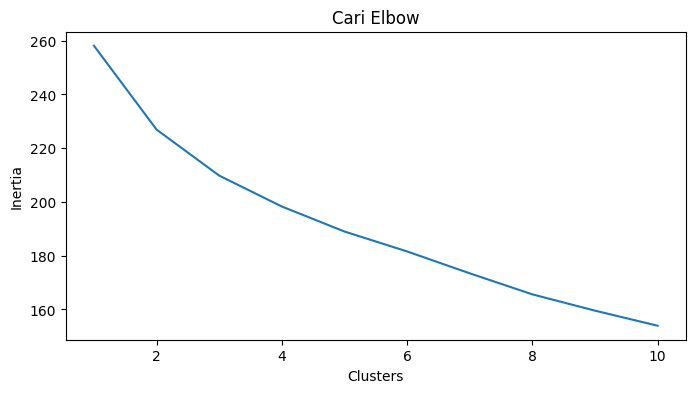

In [26]:
# Membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [27]:
# Membuat objek KMeans (ganti jumlah cluster sesuai kebutuhan)
n_clusters = 5
km = KMeans(n_clusters=n_clusters).fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
# Menambahkan kolom label pada dataset
data['Labels'] = km.labels_

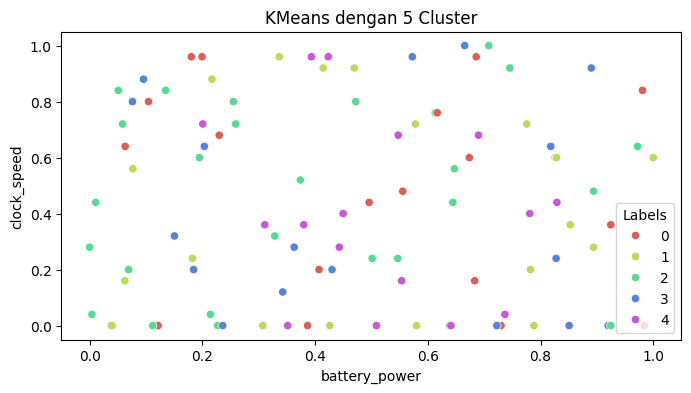

In [29]:
# Membuat plot KMeans
plt.figure(figsize=(8, 4))
sns.scatterplot(x=data['battery_power'], y=data['clock_speed'], hue=data['Labels'], palette=sns.color_palette('hls', n_clusters))
plt.title(f'KMeans dengan {n_clusters} Cluster')
plt.show()